In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

/home/abhishek/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/abhishek/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/abhishek/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# 10. This question should be answered using the Weekly data set, which is part of the ISLR package. 
# This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 
# 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.


data = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/Weekly.csv')
print(data.shape)
data.head()

(1089, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


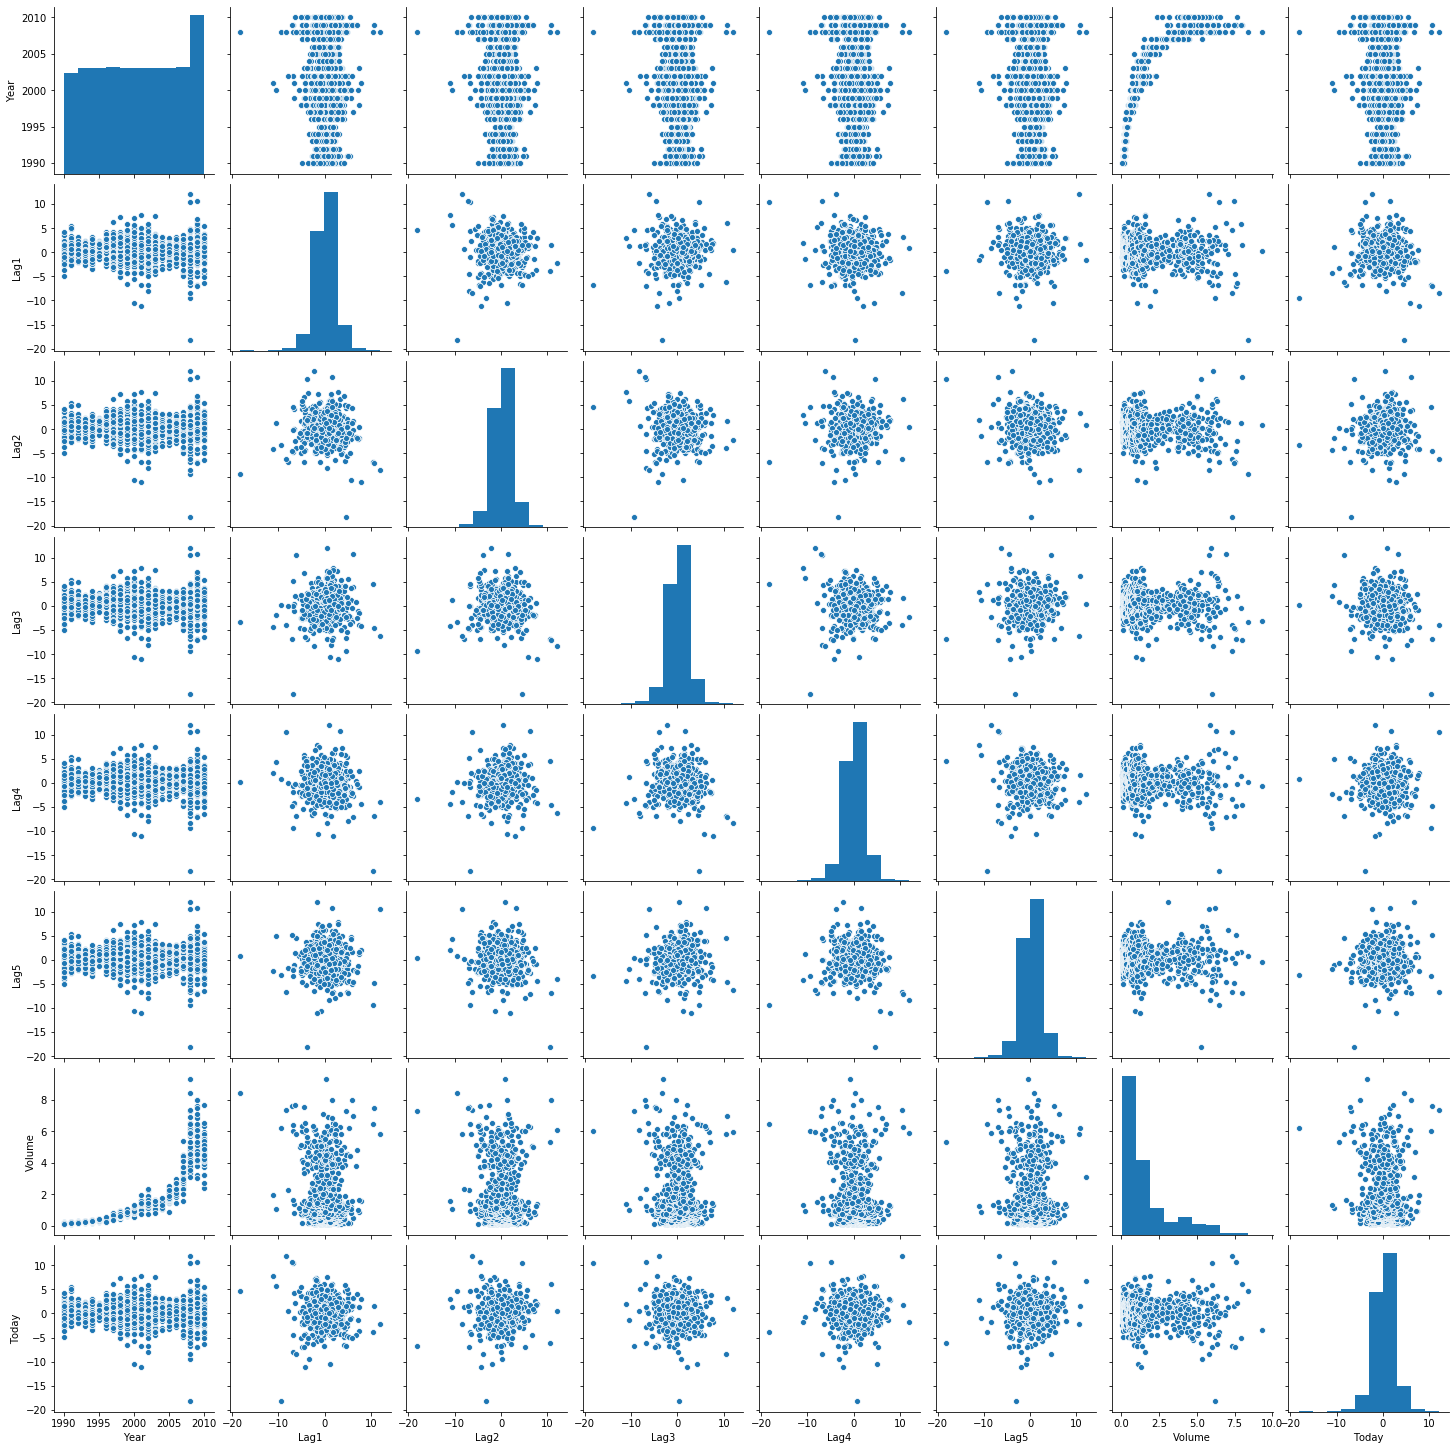

In [5]:
# (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

sns.pairplot(data)

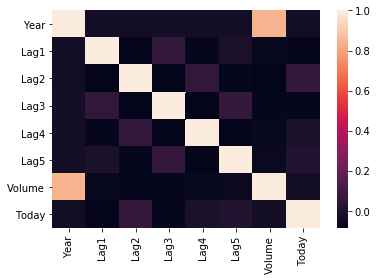

In [6]:
# correlation

corr = data.corr()
sns.heatmap(corr)

In [7]:
# Year and Volume appear to have a relationship, no other patterns are discernible

In [8]:
# (b) Use the full data set to perform a logistic regression with Direction as the response and the five 
# lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the 
# predictors appear to be statistically significant? If so, which ones?


data['Direction'] = data['Direction'].map({'Down':0, 'Up':1})


In [10]:
X = data.iloc[:,1:-2]
X = sm.add_constant(X)
y = data['Direction']

results = sm.Logit(y, X).fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 02 Nov 2020   Pseudo R-squ.:                0.006580
Time:                        11:25:16   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [11]:
# Observing the p values of the predictors, we can conclude that all the predictors except Lag2, are having a significant 
# p value.